# 1.

Standard deviation is a measure of the diffusion or dispersion of a single data point in a sample or population. It tells you how a single data point changes around the mean. A larger standard deviation indicates that the data points are more spread out, while a smaller standard deviation indicates that they are more concentrated around the mean.


The standard error of the mean is a measure of the variability or uncertainty of the sample mean as an estimate of the population mean. The standard error of the mean decreases as the sample size increases, suggesting that the larger the sample size, the more accurate the estimate of the population mean will be.


Specifically, the standard error of the mean is equal to the standard deviation divided by the square root of the sample size. This means that as the sample size increases, the standard error of the mean decreases. This is intuitive because larger samples are likely to be more representative of the population, so their mean is likely to be closer to the true population mean.

# 2.

A 95% confidence interval aims to capture the true population mean 95% of the time.  A confidence interval created using the standard error of the mean is calculated by taking the sample mean and adding/subtracting about 2 times the standard error of the mean.  This is because approximately 95% of the data in a normal distribution falls within two standard deviations of the mean.  Therefore, a confidence interval constructed in this manner should theoretically contain the true population mean 95% of the time. 

# 3.

1. Calculate your bootstrapped sample means.  You've already done this as part of the process you described in our previous conversation.

2. Apply the `np.quantile()` function to your bootstrapped sample means.   Specifically, you'll use `np.  quantile(bootstrapped_means, [0.025, 0.975])`.

Percentiles represent coverage: The 2.5th percentile and the 97.5th percentile mark the boundaries that contain the central 95% of your bootstrapped distribution.

`np.quantile()` finds those boundaries:** The `np.quantile()` function, given the specified percentiles, will output the exact values from your bootstrapped sample means that correspond to those percentiles. Therefore, the range between the values outputted by `np.  quantile(bootstrapped_means, [0.025, 0.975])` represents your 95% bootstrapped confidence interval.

# 4.

In [ ]:
import numpy as np  

# Create a sample of data
sample = np.array([1-9])

# Set the number of bootstrap samples
num_bootstrap_samples = 1000

# Create an empty array to store the bootstrapped sample means
bootstrapped_sample_means = np.empty(num_bootstrap_samples)

# Create an empty array to store the bootstrapped sample medians
bootstrapped_sample_medians = np.empty(num_bootstrap_samples)

# Loop through the number of bootstrap samples
for i in range(num_bootstrap_samples):
  # Generate a bootstrap sample by sampling with replacement from the original sample
  bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)

  # Calculate the mean of the bootstrap sample and store it in the bootstrapped_sample_means array
  bootstrapped_sample_means[i] = np.mean(bootstrap_sample)

  # Calculate the median of the bootstrap sample and store it in the bootstrapped_sample_medians array
  bootstrapped_sample_medians[i] = np.median(bootstrap_sample)

# Calculate the 95% bootstrap confidence interval for the population mean
confidence_interval_mean = np.quantile(bootstrapped_sample_means, [0.025, 0.975])

# Calculate the 95% bootstrap confidence interval for the population median
confidence_interval_median = np.quantile(bootstrapped_sample_medians, [0.025, 0.975])

# Print the results
print(f"95% Bootstrap Confidence Interval for Population Mean: {confidence_interval_mean}")
print(f"95% Bootstrap Confidence Interval for Population Median: {confidence_interval_median}")


Explanation of the Code
●Import necessary libraries: The code starts by importing the NumPy library, which is used for numerical operations in Python.

●Create a sample of data: You need to have a sample of data to perform bootstrapping. In this code, a sample is created using np.array(), but you can replace this with your own sample.

●Set the number of bootstrap samples: The number of bootstrap samples determines how many times you will resample from the original sample. A larger number of bootstrap samples will generally result in a more accurate confidence interval.

●Create arrays to store results: Empty arrays are created to store the bootstrapped sample means and medians that will be calculated later.

●Loop through bootstrap samples: The code then uses a for loop to generate the bootstrap samples and calculate the desired statistics.

Generate a bootstrap sample: Inside the loop, a bootstrap sample is created by sampling with replacement from the original sample using np.random.choice() with replace=True.

Calculate the mean and median: The mean and median of each bootstrap sample are calculated using np.mean() and np.median(), respectively. These values are then stored in their respective arrays.

●Calculate confidence intervals: After all the bootstrap samples have been generated, the np.quantile() function is used to calculate the 95% bootstrap confidence intervals for both the population mean and median. This is done by finding the 2.5th and 97.5th percentiles of the bootstrapped sample means and medians.

●Print results: Finally, the code prints the calculated confidence intervals.
Key Points

●Bootstrapping: Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic. It involves repeatedly resampling with replacement from the original sample to create multiple bootstrap samples.

●Confidence Interval: A confidence interval is a range of values that is likely to contain the true population parameter with a certain level of confidence. In this case, we are creating a 95% confidence interval, which means that we are 95% confident that the true population parameter lies within the calculated interval.

●Adapting the code for different statistics: The code can be easily adapted to calculate bootstrap confidence intervals for other population parameters by simply changing the statistic being calculated inside the loop. For example, to calculate a confidence interval for the population standard deviation, you would replace np.mean(bootstrap_sample) with np.std(bootstrap_sample).
It is important to note that the sources do not specifically discuss creating code to produce a confidence interval for the median using bootstrapping, but they do mention that bootstrapping can be applied to other statistics, like the median. You may want to further verify that applying the bootstrapping technique to the median to create a confidence interval is a valid statistical approach.


# 5.

We need to distinguish between population parameters and sample statistics because confidence intervals are used to estimate population parameters, which are unknown, using sample statistics, which are calculated from the data.

Population parameters are characteristics of the entire population that we are interested in, for example, the population mean (μ) or median.   Since it's usually impossible to measure an entire population, these values are generally unknown.
Sample statistics are values calculated from a sample of data that is taken from the population, for example, the sample mean (x̄) or median.   We use these statistics to estimate the unknown population parameters.

Confidence intervals provide a range of plausible values for the population parameter based on the observed sample statistic and the variability/uncertainty of that statistic.  The confidence level, for example, 95%, indicates the percentage of times that confidence intervals constructed using the same procedure would contain the true population parameter if we were to take many independent samples from the same population.

In essence, we use the known sample statistic to make inferences about the unknown population parameter, and the confidence interval quantifies the uncertainty associated with this estimation process.

# 6.

1. Imagine you have a small set of data (a sample), but you want to understand something about a much bigger group (the whole population).    Instead of going out and getting more data, which is expensive or time-consuming, bootstrapping helps you make the most of the data you already have.
The idea is this: you take your sample and randomly pick values from it, over and over again, to create many new "fake" samples.    These new samples are just mixes of your original data, but each one might have some repeated values and some missing.    By doing this a lot of times, you get a bunch of different samples that give you a sense of the variation in your data, which helps you estimate things like averages or other statistics more confidently.


2. Bootstrapping’s main job is to help you figure out how reliable your estimates are.    Since you don’t have access to the whole population, bootstrapping creates many versions of your data and lets you see the spread or variability in your estimates.    This gives you an idea of how much you can trust the numbers you're working with, even if your data sample is small.


3. Let’s say you have a guess, or hypothesis, about what the average of a population is, and you want to check if your guess is reasonable.  You’ve also got a small sample of data, but you're not sure if it supports your guess.

Here’s what you could do with bootstrapping:

Take your sample and use bootstrapping to create a ton of new samples (just like before, where you randomly pick values from your original data).
For each of these new samples, you calculate the average.
Now, you have a whole bunch of averages, and you can see how they spread out.
If most of these bootstrapped averages are close to your hypothesized guess, your guess might be plausible.  But if they are all far away from your guess, it’s a sign that your guess might not be that accurate.

# 7.

Null Hypothesis (No Effect): In the drug example, the null hypothesis states that the drug has no effect on average.   This means the population mean (μ) of the drug's effect is zero.

Sample Mean: This is the average calculated from your specific sample data.  It's a point estimate, and it's likely not going to be exactly zero due to random sampling variability, even if the drug is truly ineffective.

Confidence Interval: The confidence interval, often a 95% confidence interval, gives us a plausible range for the true population mean (μ), based on:
The observed sample mean (x̄)
The uncertainty associated with that sample mean due to random sampling variability (captured by the standard error)

Why Overlapping Zero Matters

When the confidence interval includes zero, it means that zero is a plausible value for the population mean (μ).   In other words, we can't rule out the possibility that the drug has no effect (or a very small effect indistinguishable from zero, given our data).

**Here's the key:** Even though our sample mean might not be exactly zero, the confidence interval tells us that if we repeatedly sampled from the same population and calculated the sample mean each time, we'd expect a certain percentage (e.g., 95% for a 95% confidence interval) of those sample means to fall within that interval – and some of them would likely be very close to zero, including zero itself.

**To Reject the Null Hypothesis**

To reject the null hypothesis, our data needs to provide strong evidence *against* it.  This happens when the confidence interval does *not* contain zero.  For example, if the entire confidence interval were positive, it would suggest that the drug likely has a positive effect, and we would reject the null hypothesis of no effect.

# 8.

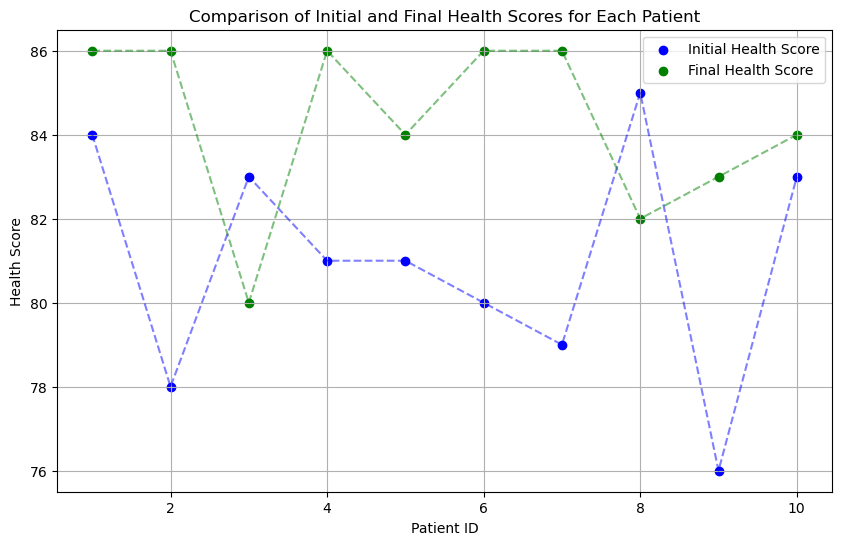

Initial Health Score Mean: 81.0
Final Health Score Mean: 84.3
Mean Difference (Bootstrapped): 3.3107299999999995
95% Confidence Interval: [0.9000000000000057, 5.599999999999994]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create the dataset from the problem description
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Basic statistics
initial_mean = df['InitialHealthScore'].mean()
final_mean = df['FinalHealthScore'].mean()
initial_median = df['InitialHealthScore'].median()
final_median = df['FinalHealthScore'].median()

# Visualizing the comparison between Initial and Final Health Scores
plt.figure(figsize=(10,6))
plt.scatter(df['PatientID'], df['InitialHealthScore'], color='blue', label='Initial Health Score')
plt.scatter(df['PatientID'], df['FinalHealthScore'], color='green', label='Final Health Score')
plt.plot(df['PatientID'], df['InitialHealthScore'], color='blue', linestyle='--', alpha=0.5)
plt.plot(df['PatientID'], df['FinalHealthScore'], color='green', linestyle='--', alpha=0.5)
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores for Each Patient')
plt.legend()
plt.grid(True)
plt.show()

# Function to perform bootstrap resampling
def bootstrap_resample(data, n_resamples=1000):
    boot_means = []
    np.random.seed(42)  # Ensuring reproducibility
    for _ in range(n_resamples):
        sample = data.sample(frac=1, replace=True)  # Resample with replacement
        mean_diff = sample['FinalHealthScore'].mean() - sample['InitialHealthScore'].mean()
        boot_means.append(mean_diff)
    return boot_means

# Performing bootstrapping
n_resamples = 10000
boot_means = bootstrap_resample(df, n_resamples)

# Calculating the confidence intervals
lower_ci = np.percentile(boot_means, 2.5)
upper_ci = np.percentile(boot_means, 97.5)

# Mean of the bootstrap means (expected difference in health scores)
mean_diff_bootstrap = np.mean(boot_means)

print(f"Initial Health Score Mean: {initial_mean}")
print(f"Final Health Score Mean: {final_mean}")
print(f"Mean Difference (Bootstrapped): {mean_diff_bootstrap}")
print(f"95% Confidence Interval: [{lower_ci}, {upper_ci}]")


Bootstrapping Results:

Mean difference in health scores (bootstrapped): 3.31

95% Confidence Interval: [0.90, 5.60]

The bootstrapping analysis shows a significant improvement in health scores after the vaccine. Since the 95% confidence interval does not include zero, we can reject the null hypothesis, meaning the vaccine has a statistically significant positive effect.

This result suggests that the improvement in health scores is not due to random chance but is likely a result of the vaccine.

# 9.

Yes

# STA130 Custom NBLM Chatbot conversation summary

This is a summary of the exchanges:

You asked for an explanation about confidence intervals and hypothesis testing in the context of the statement "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is \[on average] not doing anything".

You were provided with an explanation that highlighted the following points:

*   Confidence intervals provide a range of plausible values for population parameters.
*   The null hypothesis, in this case, assumes no effect from the drug.
*   Failing to reject the null hypothesis occurs when the data does not provide enough evidence to contradict it. This happens when the confidence interval includes zero, indicating "no effect" as a possibility.
*   Rejecting the null hypothesis requires the confidence interval to exclude zero.

The explanation was then illustrated using the analogy of an unbalanced scale and a small object, where the confidence interval was likened to the range of "nearly balanced" states on the scale.

You then presented the "AliTech Vaccine Data Analysis Assignment," which involved analyzing data to assess the effectiveness of a new vaccine. The assignment required:

*   Visual representation of the comparison.
*   Quantitative analysis with explanation.
*   Conclusion regarding the null hypothesis of "no effect".
*   Clarity in documentation, code, and reporting.

You were provided with a structured guide for approaching the assignment, incorporating elements from the conversation and the sources. The guidance included:

*   **Problem Introduction:** Defining the context and the null hypothesis.
*   **Data Visualization:** Suggesting a side-by-side box plot to compare initial and final health scores.
*   **Quantitative Analysis:** Recommending bootstrapping to estimate the variability of the average difference in health scores, providing a step-by-step explanation of the process, and suggesting a histogram of bootstrapped mean differences.
*   **Findings and Discussion:**  Explaining how to interpret the confidence interval in relation to the null hypothesis, emphasizing the importance of a clear conclusion, and considering limitations, the need for additional data, and ethical implications.

The response concluded by reiterating the significance of a well-structured approach, clear explanations, and evidence-based conclusions. 
